In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('output_data.csv')

df

,id,clientID,topic,message,timestamp
0,12,23.1;62.9;18,t4g1,NaN,2024-07-09 13:00:18
1,13,23.1;62.8;23,t4g1,NaN,2024-07-09 13:00:34
2,14,23.1;62.8;23,t4g1,NaN,2024-07-09 13:00:48
3,15,23.1;62.7;23,t4g1,NaN,2024-07-09 13:01:04
4,16,23.0;63.2;23,t4g1,NaN,2024-07-09 13:01:19
...,...,...,...,...,...
1493,1505,t4g1:139,t4g1,31.3;48.5;42,2024-07-29 19:09:49
1494,1506,t4g1:139,t4g1,31.7;49.2;40,2024-07-29 19:19:49
1495,1507,t4g1:139,t4g1,31.9;49.5;40,2024-07-29 19:29:49
1496,1508,t4g1:139,t4g1,32.0;50.2;39,2024-07-29 19:39:51


In [3]:
# Set the 'id' column as the index of the dataset
df.set_index('id', inplace=True)

# Display the first few rows of the updated dataset
df.head()


,clientID,topic,message,timestamp
id,,,,
12,23.1;62.9;18,t4g1,NaN,2024-07-09 13:00:18
13,23.1;62.8;23,t4g1,NaN,2024-07-09 13:00:34
14,23.1;62.8;23,t4g1,NaN,2024-07-09 13:00:48
15,23.1;62.7;23,t4g1,NaN,2024-07-09 13:01:04
16,23.0;63.2;23,t4g1,NaN,2024-07-09 13:01:19


In [4]:
data_removed = df.drop(index=range(12,312))
df = data_removed

df

,clientID,topic,message,timestamp
id,,,,
312,t4g1:139,t4g1,23.9;69.1;24,2024-07-15 16:41:47
313,t4g1:139,t4g1,26.2;61.6;26,2024-07-15 17:07:16
314,t4g1:139,t4g1,26.9;59.5;27,2024-07-15 17:17:16
315,t4g1:139,t4g1,26.7;59.8;28,2024-07-15 17:27:17
316,t4g1:139,t4g1,26.6;60.2;28,2024-07-15 17:37:17
...,...,...,...,...
1505,t4g1:139,t4g1,31.3;48.5;42,2024-07-29 19:09:49
1506,t4g1:139,t4g1,31.7;49.2;40,2024-07-29 19:19:49
1507,t4g1:139,t4g1,31.9;49.5;40,2024-07-29 19:29:49


In [5]:
data_removed2 = df.drop(index=range(477,480))
df = data_removed2

df

,clientID,topic,message,timestamp
id,,,,
312,t4g1:139,t4g1,23.9;69.1;24,2024-07-15 16:41:47
313,t4g1:139,t4g1,26.2;61.6;26,2024-07-15 17:07:16
314,t4g1:139,t4g1,26.9;59.5;27,2024-07-15 17:17:16
315,t4g1:139,t4g1,26.7;59.8;28,2024-07-15 17:27:17
316,t4g1:139,t4g1,26.6;60.2;28,2024-07-15 17:37:17
...,...,...,...,...
1505,t4g1:139,t4g1,31.3;48.5;42,2024-07-29 19:09:49
1506,t4g1:139,t4g1,31.7;49.2;40,2024-07-29 19:19:49
1507,t4g1:139,t4g1,31.9;49.5;40,2024-07-29 19:29:49


In [6]:


split_client = df['message'].str.split(';', expand=True)
split_columns = ['temperature', 'air quality', 'humidity']

df = pd.concat([df, split_client], axis=1)

#drop columns

df = df.drop(columns=['clientID'])

df

,topic,message,timestamp,0,1,2
id,,,,,,
312,t4g1,23.9;69.1;24,2024-07-15 16:41:47,23.9,69.1,24
313,t4g1,26.2;61.6;26,2024-07-15 17:07:16,26.2,61.6,26
314,t4g1,26.9;59.5;27,2024-07-15 17:17:16,26.9,59.5,27
315,t4g1,26.7;59.8;28,2024-07-15 17:27:17,26.7,59.8,28
316,t4g1,26.6;60.2;28,2024-07-15 17:37:17,26.6,60.2,28
...,...,...,...,...,...,...
1505,t4g1,31.3;48.5;42,2024-07-29 19:09:49,31.3,48.5,42
1506,t4g1,31.7;49.2;40,2024-07-29 19:19:49,31.7,49.2,40
1507,t4g1,31.9;49.5;40,2024-07-29 19:29:49,31.9,49.5,40


In [7]:
# Renaming the columns
df = df.rename(columns={
    0: 'Temperature (°C)',
    1: 'Air Quality',
    2: 'Humidity',
    
})

# Display the first few rows of the updated data
df



,topic,message,timestamp,Temperature (°C),Air Quality,Humidity
id,,,,,,
312,t4g1,23.9;69.1;24,2024-07-15 16:41:47,23.9,69.1,24
313,t4g1,26.2;61.6;26,2024-07-15 17:07:16,26.2,61.6,26
314,t4g1,26.9;59.5;27,2024-07-15 17:17:16,26.9,59.5,27
315,t4g1,26.7;59.8;28,2024-07-15 17:27:17,26.7,59.8,28
316,t4g1,26.6;60.2;28,2024-07-15 17:37:17,26.6,60.2,28
...,...,...,...,...,...,...
1505,t4g1,31.3;48.5;42,2024-07-29 19:09:49,31.3,48.5,42
1506,t4g1,31.7;49.2;40,2024-07-29 19:19:49,31.7,49.2,40
1507,t4g1,31.9;49.5;40,2024-07-29 19:29:49,31.9,49.5,40


In [8]:
#missing values 

nan_values = df.isnull().sum().sum()

print(f"The number of null values is {nan_values}")

The number of null values is 0


In [9]:
#save the final dataset

df.to_csv('final_dataset.csv')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


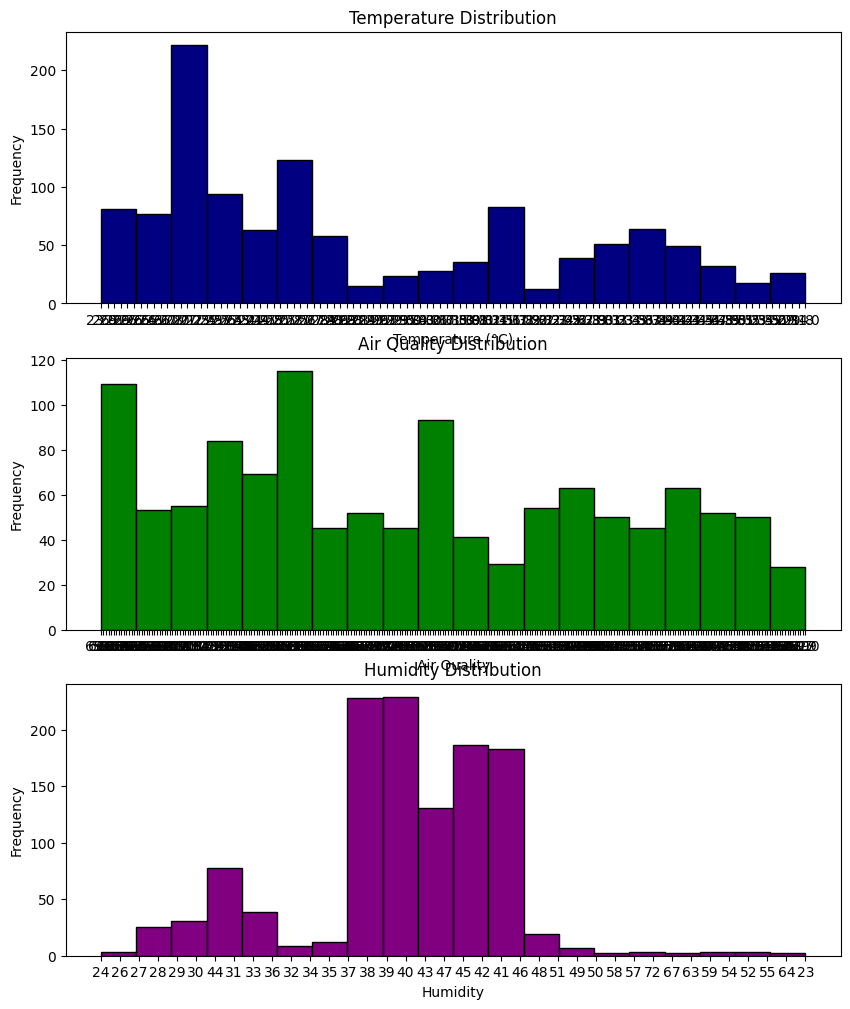

In [11]:
#creating histogram 

fig, axes = plt.subplots(3, 1, figsize=(10,12))

#Temperature Histogram 

axes[0].hist(df['Temperature (°C)'], bins=20, color='navy', edgecolor='black')
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Frequency')

#Air Quality Histogram

axes[1].hist(df['Air Quality'], bins=20, color='Green', edgecolor='black')
axes[1].set_title('Air Quality Distribution')
axes[1].set_xlabel('Air Quality')
axes[1].set_ylabel('Frequency')

#Humidity

axes[2].hist(df['Humidity'], bins=20, color='Purple', edgecolor='black')
axes[2].set_title('Humidity Distribution')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Frequency')

# plt.tight_layout()
plt.show()

In [12]:
import plotly.express as px

# Temperature Distribution
fig_temp = px.histogram(df, x='Temperature (°C)', nbins=20, title='Temperature Distribution')
fig_temp.show()

# Air Quality Distribution
fig_air_quality = px.histogram(df, x='Air Quality', nbins=20, title='Air Quality Distribution')
fig_air_quality.show()

# Humidity Distribution
fig_humidity = px.histogram(df, x='Humidity', nbins=20, title='Humidity Distribution')
fig_humidity.show()
